# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

At the beginnin the smartcab is in a random position.

- *Does the Smartcab move at all during the simulation?*

During a Training Trial the Smartcab does not move from its position, when a new Training Trian starts, the smartcab appears in a new position, but again it does not move.

- *What kind of rewards is the driving agent receiving? How does the light changing color affect the rewards?*  

There are different kinds of rewarts, some with a positive reward and other with negative rewards.

    - Agent properly idled at a red light. (rewarded 1.32)
    - Agent idled at a green light with no oncoming traffic. (rewarded -4.56)
    - Agent idled at a green light with oncoming traffic. (rewarded 0.13)
    


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- **In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.**
    1. Create the driving agent
    Flags:
       learning   - set to True to force the driving agent to use Q-learning
        * epsilon - continuous value for the exploration factor, default is 1
        * alpha   - continuous value for the learning rate, default is 0.5

In this flag, if we want to use de Q-learning for the smartcab we would change it tu True value.

    2. Follow the driving agent
    Flags:
       enforce_deadline - set to True to enforce a deadline metric
      
Here, if we would like that the simulations stop runing after a deadline we will change this flat to True

    3. Create the simulation
    Flags:
       update_delay - continuous time (in seconds) between actions, default is 2.0 seconds

Finally, is the time bewteen actions

- **In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?**

In the environment.py Python file, it appears that the 'act(self, agent, action)' function,  is the Environment class function that is called when an agent performs an action.

- **In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?**

Both functions  display the current state of the simulation at each step in the simulation, but in different ways. 
First, the 'render_text()' function display the current state in a textual format; whereas, the 'render()' function displays this in a nice Graphical User Interface (GUI) using the Python PyGame module. 
It can be seen that the two functios are required, since the GUI's simulation display will not have historical information, but we can scroll back in the textural render to find historical information.

- **In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?**

It can be seen this function will consider the East-West direction first and then North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


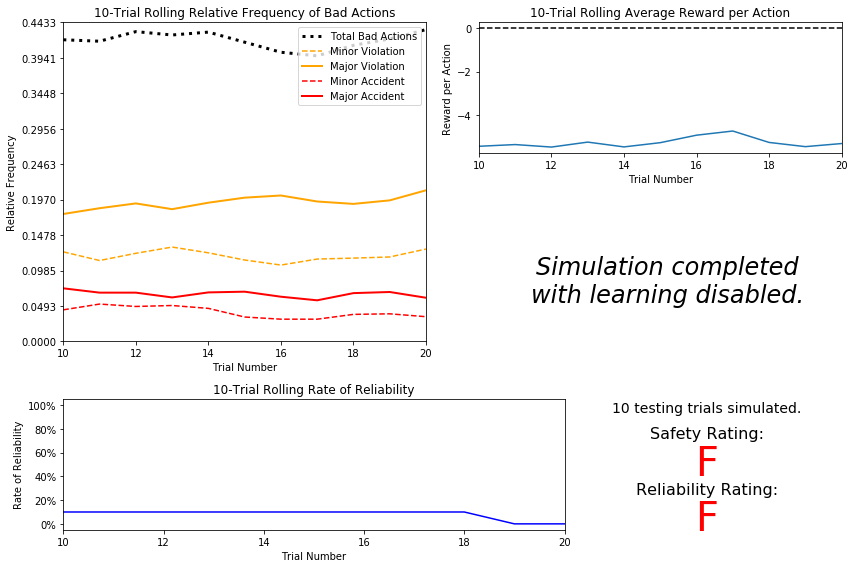

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**


It can be seen thtat the driving agent appears to be making extremely bad decisions very frequent. The first graph shots that ~40% of all actions were considered bad ones, aproximely 20% being major violations, and 5% major accidents. 

Moreover, the Smartcab received on average negative rewards for all the trials. The rate of rialiability measurements shows that the agent can not reach the destination, it fails to  reach its target in all the simulations. This is not a surprise since  the actions are choosen randomily and it does not consider  where it should go or how are the traffic conditions. 

Finally, the car's performance did not improve with time, it demonstrates that random choice does not means a 'self-learning' algorithm. The smartcab would not be allowed to be on the road. It has no reliability, no ability to learn, and is highly unsafe.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

*Safety*

As it has mentioned prevously, the inputs variable contains the information that is required to ensure that the Smartcab follows the rules. Moreover, the inputs contain the state of the light (green or red), and if there are cars   incoming from any direction.

light : the color of the light determines if the agent should move or not, if it moves when the light is red, this would be very hazardous to the other drivers, therefore,  light is a very important feature for safety.

left: this feature is only important if the vehicle wants to take the decision to turn left, if the agent is moving right, this may not affect the safety of the decision. This information is important for learning the rule of being allowed to take a left turn when there is a red light.

oncoming: this feature is important sice the oncoming traffic should not intersect with the direction of travel of the vehicle, which would lead to a major accident. .

*Efficieny*

The agent needs information from the waypoint and deadline variables. The first  gives  information about what direction to take next, and the deadline information gives a measure of how much time is remaining until the trial ends.

*Features not appropriate*

There are some features that are not always helpful in a learning stage. For instance, the 'right' input is not necessary in most Europe and US, because in case of a green light or a red light, the right lane traffic will not interfer with the smartcab's direction. Moreover, the is a good feature to consider, but the agent should be able to be encouraged to reach the target without knowledge of the deadline. This is because in a good strategy, the cab should always go to the destination as soon as possible.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The selected features in question 4 were: (light, left, right, oncoming, waypoints, deadline).

light : it has 2 possible values - red, green
left : it has 4 possible values - None, left, right, forward
right : it has 4 possible values - None, left, right, forward,
oncoming: it has 4 possible values - None, left, right, forward,
waypoint: it has 3 possible values - left, right, forward,
deadline: discrete values between 0 and distance 5 ( number of intersections 5 time steps per intersection)


It has to be mentioned that for a given grid of size 8 $*$ 6 as defined the default grid, the maximum deadline would be 10 $*$ 5 = 50.

Moreover, the total number of possible states with all the features avaialable are : 2 $*$ 4 $*$ 4 $*$ 4 $*$ 3 $*$ 50 = 19200 states.

Here,  we are trying 20 trials before testing, then, it is  unlikely that the smartcab  gets information for all the possible states.

We can then reduce the state space reducing the number of features, for instance: light, oncoming and waypoint. then the number of possibles states will be: 2 $*$ 4 $*$ 3 = 24.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

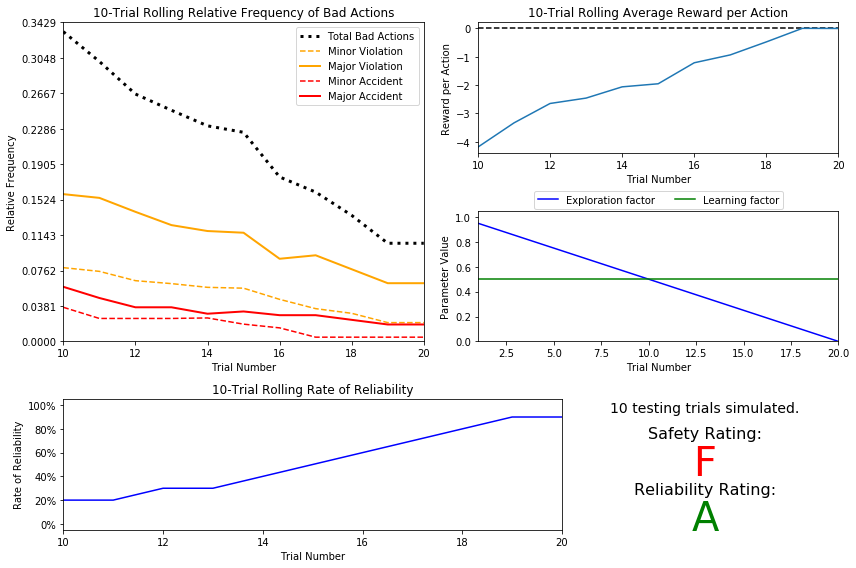

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_previous.csv')

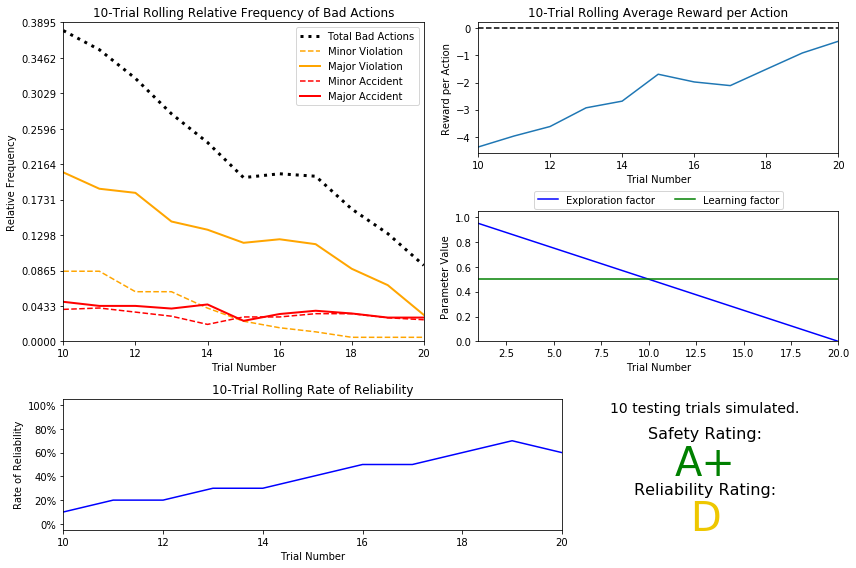

In [9]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

It can be seen in the 10 trial rolling relative frequency of bad actions:
- The total number of bad actions has decreased from 40% for the smartcab to near 12% in the learnt agent.
- The number of major accidents is approx. 4% which means that bad decisions taken by the learnt agent are more likely to lead to a major accident, nevertheless we have to say that the learning agent takes relatively less bad actions.

According to the rolling average reward graph:
- We  can see that the smartcab is now recieving an average of around 0 points per decision at the end, this is a great improvement of 5 points from the previous agent.

In the rate of reliability and parameter value:
- The agent achieves more than 80% reliability by the end of 20 trials as compared to the 20% of the previous agent. Moreover,   the epsilon function was a linear decay of 0.05 it would take 20 trials for the epsilon to decay from 1 to 0.  Furthermore, learning factor graph by a straight line going from 1 to 0. 

Finally,  the driving agent is significantly safer and more reliable than the previous agent, which achieved F in both the reliability and the safety. Here, the cab  achieves a grade D in safety and a grade A+ in reliability, when we performed two times the simulations, it  means its still very unsafe to drive in this car and is likely to reach the destination 90% of the time in the 10 test trials. This driver cannot be used for a real life scenario.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

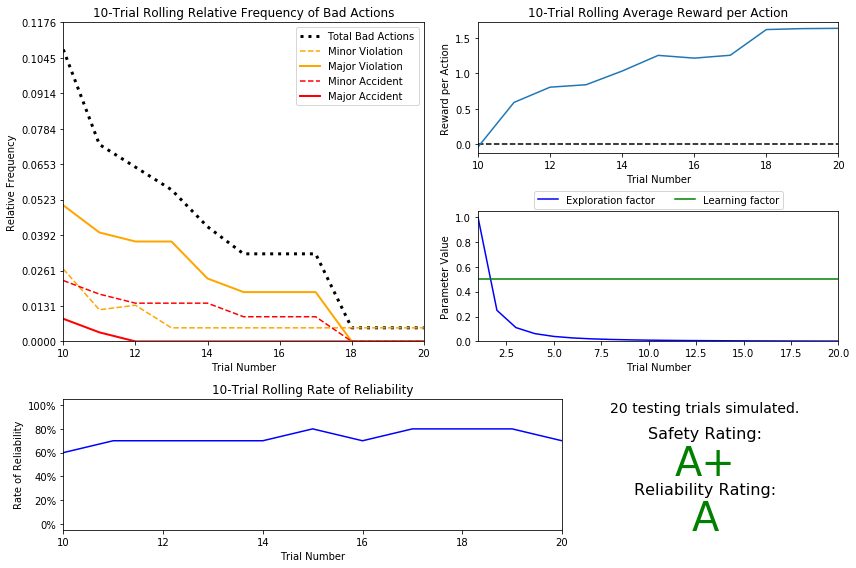

In [29]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The decay function used for the exploration factor was: $$ \epsilon = 1/t^2 $$ 
The decay function converges to 0 at around the 5th trial. 

Here, I consider thee epsilon-tolerance at 0.01 and  the alpha rate constant to 0.5. I would like to see if the learner process  has sufficient time to explore the environment and if it  reinforce what it has learnt, by keeping the epsilon decay function as an exponential decay it ensures that the learner is exploring aggressively in the beginning and will start to spend time reinforcing what it learns midway through the trial period.


The improved Q-Learner works much better when compared to the default Q-learner.
From the rolling Frequency of bad decisions, it can be seen that rapidly converged to 0% bad decisions and almost 0% major accidents.
The reliability of the learner also approaches 90% by the end of the trial period and is clearly reflected on the reliability score which came as A, this is much better than the previous learner which struggled to cross the 90% in reliability.

The average reward of the learner is also  higher than in the previous case before, it acheives an average of positive 1.5 point per decision, which means that it the smartcab is performing good desicions.


The behaviour of the smartcab is satisfactory, because it is a very significant improvement over the basic Q learner. This agent is possibly a very good candidate for a smartcab because it acheives a very high safety and reliability score.


### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 


As I have pointed before, the defined state space has the form (waypoint, light, oncoming) the expected optimal policy for the algorithm should have a few essential features:

If the oncoming traffic is in a direction which will cause a collision, this action should be avoided.

For example, the agent in a state ('forward', 'green', 'backward') should have the highest Q state in either left of right.

Moreover, if the oncoming traffic is in the same direction as the waypoint, the waypoint direction should be given preference. For instance,  the agent in a state (forward, green, forward) should move forward, since it will not cause a collision and will get them closer to the destination

However, the agent should  learn the left turn rule, where it is not allowed to turn left if the oncoming traffic is turning right. For instance,  the agent in a state (left, green, right) should have a heavy penalty on the left action.


Any movement in a red light state should have the largest negative penalty. This would mean the agent has learnt the most basic traffic rule.

For example, the agent in a state ('forward', 'red', 'forward') shoud have None as the max Q action. As we ignored the state of left, the agent will not have reliably learnt the right turn rule of the traffic, where it is permited to take right on a red light if there is no oncoming traffic from the left side.

For instance,  the agent in state (right, 'red' , forward) and (right, 'red', 'left') should not have much difference and will likely just stay idle. Vice versa most of the states in the 'green' light should encourage movement, but certain conditions should be satisfied.


The policy which was created by the learner displays the following states:



 
 ('forward', 'red', 'forward')
 -- forward : -5.00
 -- None : 1.36
 -- right : 0.00
 -- left : -7.62
 

This seems correct for the reasons stated above.



 ('forward', 'green', 'forward')
 -- forward : 1.65
 -- None : -2.40
 -- right : 0.00
 -- left : -14.83
 
This seems correct for the reasons stated above.



 
 ('right', 'red', None)
 -- forward : -20.29
 -- None : 2.22
 -- right : -8.56
 -- left : -5.23
 
 
 ('right', 'red', 'forward')
 -- forward : -5.18
 -- None : 0.83
 -- right : -9.58
 -- left : 0.00
 


('right', 'red', 'right')
 -- forward : -5.37
 -- None : 1.70
 -- right : 0.00
 -- left : 0.00
 
 ('right', 'red', 'left')
 -- forward : -4.79
 -- None : 1.47
 -- right : -3.64
 -- left : -5.24

As it has been mentioned  above on the red light, when the agent wants to turn right, it has no idea about the right turn rule.



It can be seen that the algorithm learns  negative rewards for those  actions that would create a major traffic accident. 


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

It can be seen that every state is local, thus, there is no benefit to 'linking' actions together in this scenario. For instance, moving left correctly on one turn, will not affect the next decision the agent makes. Thus, the cab is not aware of the complete environment, only the intersection where it is. Therefore, it is not able to  plan ahead of time. As  we are not allowed to  plan ahead more than one move, long-term rewards are not proper in this context.

Since the environment changes in every trial, there is no benefit to being on one particular position on the grid. This suggests that there should be no long term reward associated with any position in the environment.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.